In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [68]:
df=pd.read_csv('road-accidents.csv')
df.head()

,##### LICENSE #####
0,# This data set is modified from the original ...
1,# and it is released under CC BY 4.0 (https://...
2,##### COLUMN ABBREVIATIONS #####
3,# drvr_fatl_col_bmiles = Number of drivers inv...
4,# perc_fatl_speed = Percentage Of Drivers Invo...


In [69]:
df

,##### LICENSE #####
0,# This data set is modified from the original ...
1,# and it is released under CC BY 4.0 (https://...
2,##### COLUMN ABBREVIATIONS #####
3,# drvr_fatl_col_bmiles = Number of drivers inv...
4,# perc_fatl_speed = Percentage Of Drivers Invo...
5,# perc_fatl_alcohol = Percentage Of Drivers In...
6,# perc_fatl_1st_time = Percentage Of Drivers I...
7,##### DATA BEGIN #####
8,state|drvr_fatl_col_bmiles|perc_fatl_speed|per...
9,Alabama|18.8|39|30|80


In [70]:
col_names=df.iloc[8,0]
col_names=col_names.split('|')
col_names

['state',
 'drvr_fatl_col_bmiles',
 'perc_fatl_speed',
 'perc_fatl_alcohol',
 'perc_fatl_1st_time']

#### drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)
#### perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)
#### perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)
#### perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)

In [71]:
df.drop(index=[i for i in range(0,9,1)],inplace=True)
df

,##### LICENSE #####
9,Alabama|18.8|39|30|80
10,Alaska|18.1|41|25|94
11,Arizona|18.6|35|28|96
12,Arkansas|22.4|18|26|95
13,California|12|35|28|89
14,Colorado|13.6|37|28|95
15,Connecticut|10.8|46|36|82
16,Delaware|16.2|38|30|99
17,District of Columbia|5.9|34|27|100
18,Florida|17.9|21|29|94


In [72]:
state=[]
drvr_fatl_col_bmiles=[]
perc_fatl_speed=[]
perc_fatl_alcohol=[]
perc_fatl_1st_time=[]
for i in range(0,df.shape[0]):
    s=df.iloc[i,0].split('|')
    state.append(s[0])
    drvr_fatl_col_bmiles.append(s[1])
    perc_fatl_speed.append(s[2])
    perc_fatl_alcohol.append(s[3])
    perc_fatl_1st_time.append(s[4])

In [73]:
drvr_fatl_col_bmiles[0:4]

['18.8', '18.1', '18.6', '22.4']

In [74]:
d = {'state': state, 'drvr_fatl_col_bmiles': drvr_fatl_col_bmiles, 'perc_fatl_speed':perc_fatl_speed,'perc_fatl_alcohol':perc_fatl_alcohol,'perc_fatl_1st_time':perc_fatl_1st_time}
df = pd.DataFrame(data=d,dtype=float)
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39.0,30.0,80.0
1,Alaska,18.1,41.0,25.0,94.0
2,Arizona,18.6,35.0,28.0,96.0
3,Arkansas,22.4,18.0,26.0,95.0
4,California,12.0,35.0,28.0,89.0


In [75]:
df.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


In [76]:
df['drvr_fatl_col_bmiles'].min(),df['drvr_fatl_col_bmiles'].max()

(5.9, 23.9)

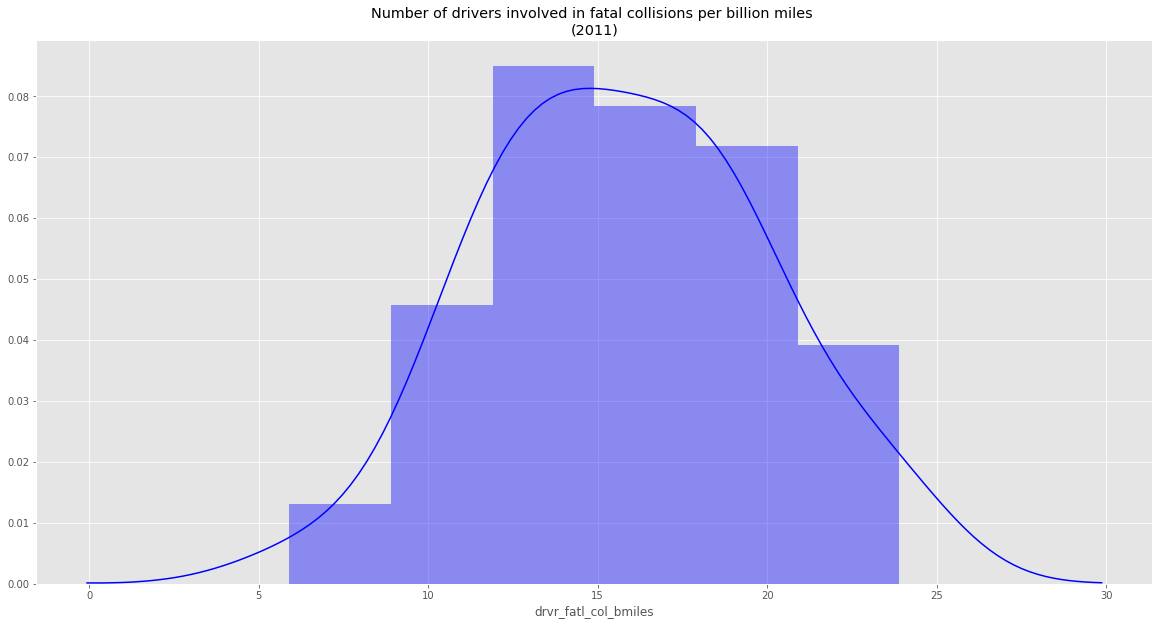

In [90]:
x=df['drvr_fatl_col_bmiles']
plt.figure(figsize=(20,10))
sns.distplot(x,color='blue')
plt.title('Number of drivers involved in fatal collisions per billion miles \n(2011)')
plt.show()

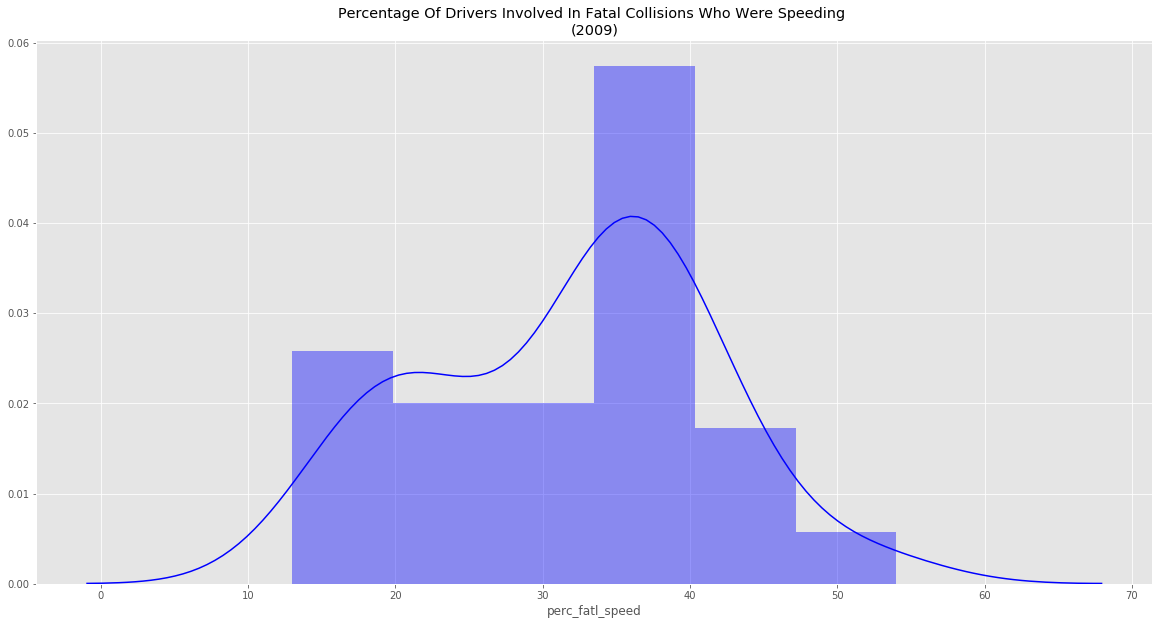

In [91]:
x=df['perc_fatl_speed']
plt.figure(figsize=(20,10))
sns.distplot(x,color='blue')
plt.title('Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding \n(2009)')
plt.show()

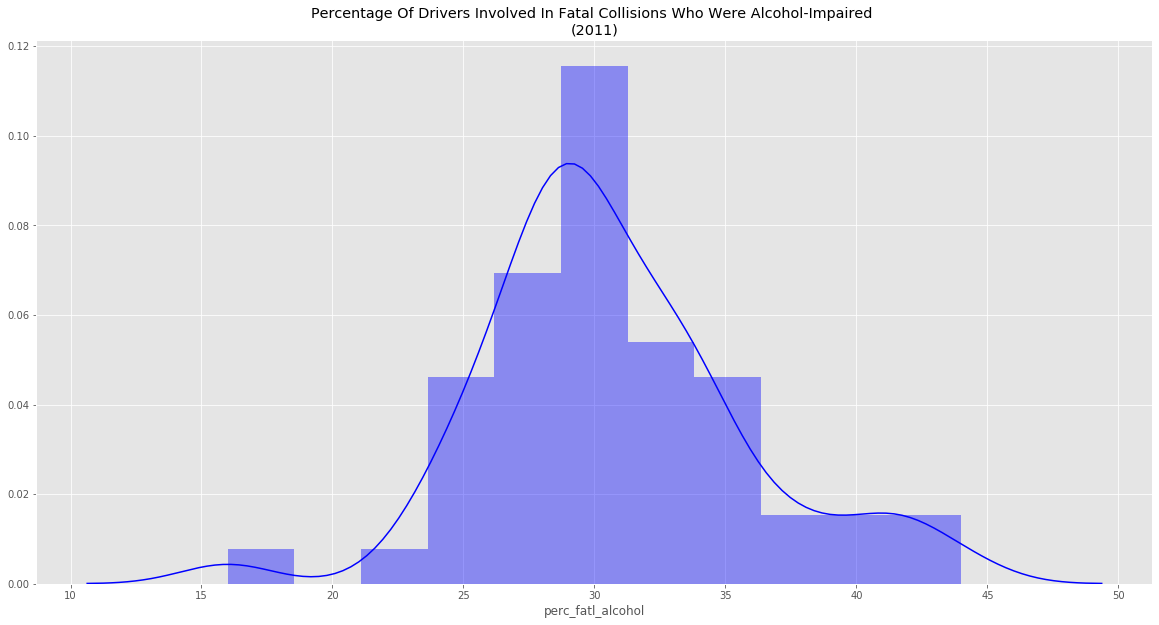

In [92]:
x=df['perc_fatl_alcohol']
plt.figure(figsize=(20,10))
sns.distplot(x,color='blue')
plt.title('Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired \n(2011)')
plt.show()

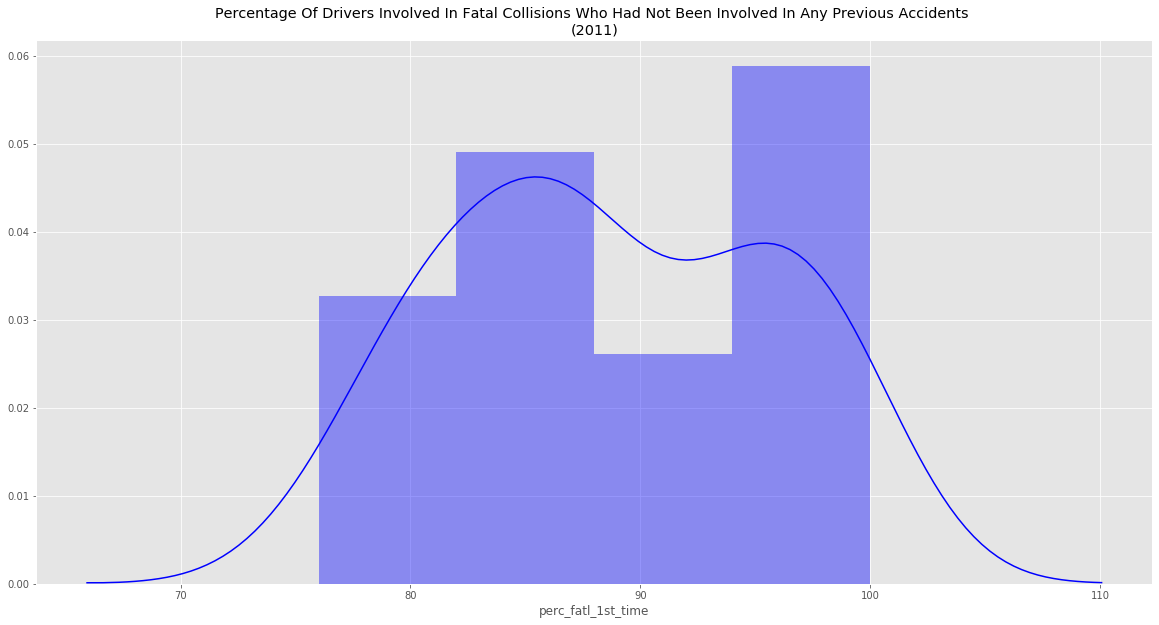

In [93]:
x=df['perc_fatl_1st_time']
plt.figure(figsize=(20,10))
sns.distplot(x,color='blue')
plt.title('Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents \n(2011)')
plt.show()